# Classification Modeling 

# Abstract

In this project, we will explore classification modeling using K-nearest neighbors (KNN) and Decision Trees.  We will also be using the dataset below to see how we can build and tune our models for optimal performance.


### Dataset

In this project, we will build a classification model using K-Nearest Neighbors(KNN) and Decision Trees, utilizing the following dataset:  https://www.openml.org/d/1590
The information from the dataset was originally derived from the Census Bureau surveys in 1996.  

For more information on the features available within the dataset, refer to the link above.

### Import files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, fbeta_score, recall_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
data = pd.read_csv('./data/phpMawTba.csv')

## Data Cleaning

Since this file was initally mined by someone else, it was relatively clean and ordered.
There were some additional operations needed to put the data in the proper format and to type cast certain columns.

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [6]:
for col in data.columns:
    print(f'{col}\n{data[col].unique()}\n')

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

workclass
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

education
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']

education-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

marital-status
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']

occupation
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-

In [7]:
## This line of code takes care of trailing and leading whitespace within series that contain string objects
for col in data.columns:
    try:
        data[col] = data[col].apply(lambda x: x.strip())
    except:
        continue
        
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
for col in data.columns:
    print(f'{col}\n{data[col].unique()}\n')

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

education-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Trans

In [9]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Visualization 

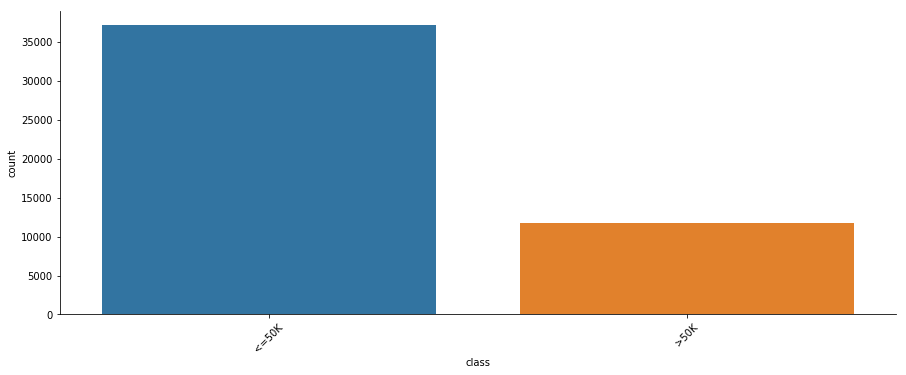

In [10]:
sns.catplot(x='class', kind='count', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

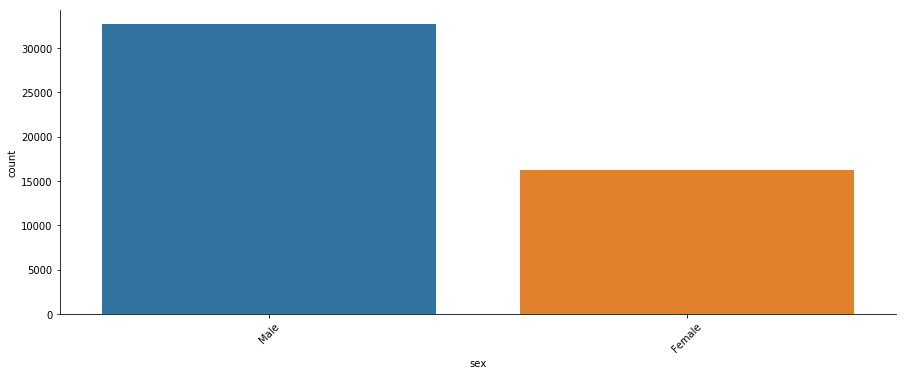

In [11]:
sns.catplot(x='sex', kind='count', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

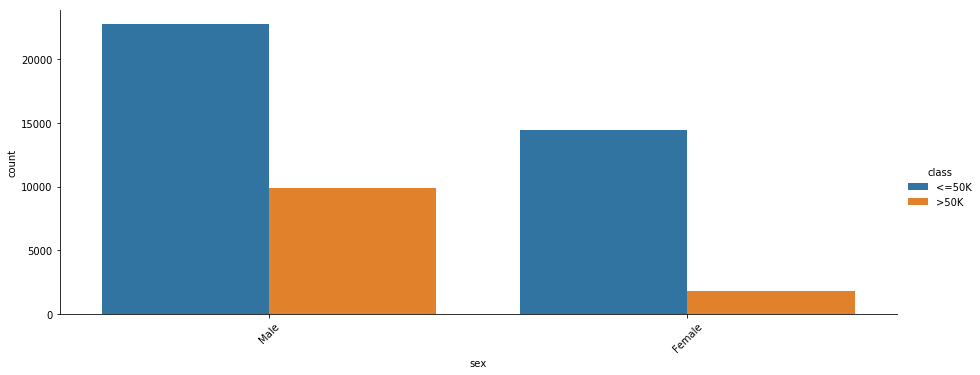

In [12]:
sns.catplot(x='sex', kind='count', hue='class', data=data, aspect=2.5, )
plt.xticks(rotation=45)
plt.show()

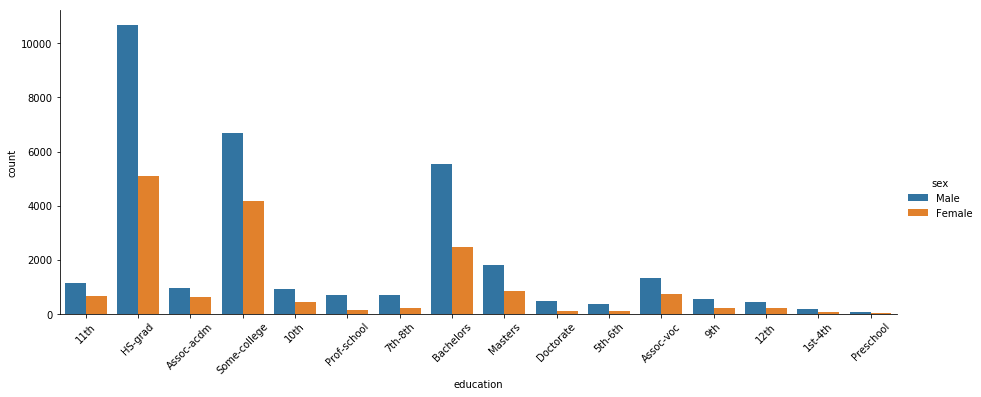

In [13]:
sns.catplot(x='education', kind='count', hue='sex', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

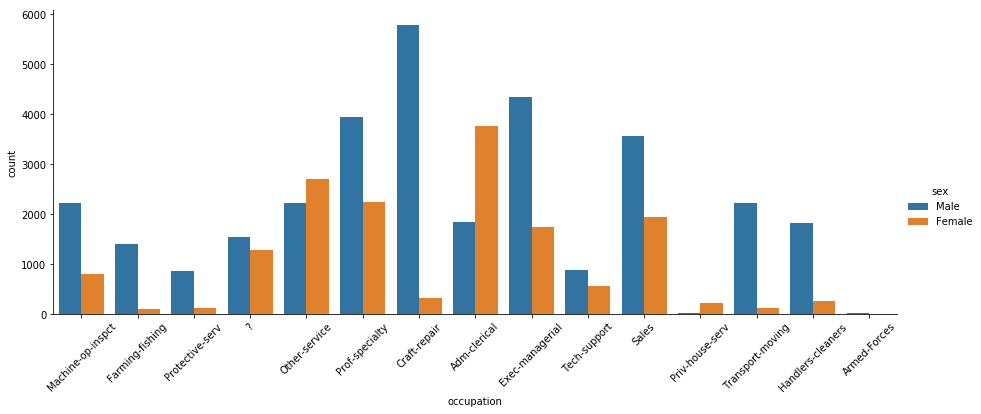

In [14]:
sns.catplot(x='occupation', kind='count', hue='sex', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

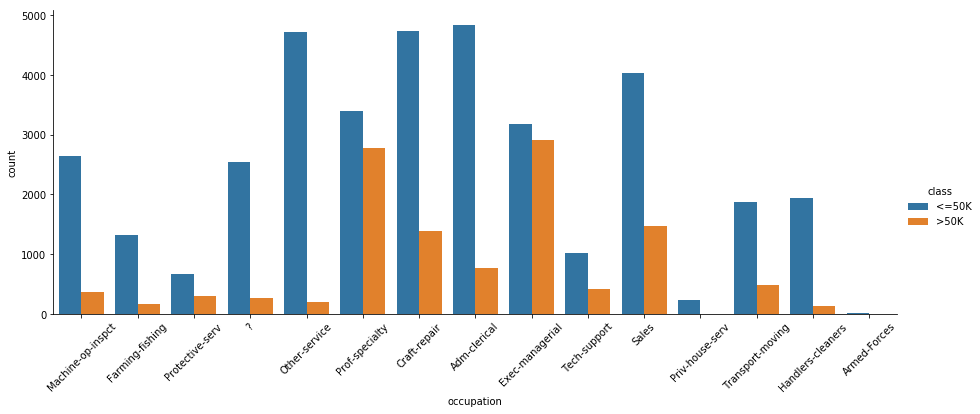

In [15]:
sns.catplot(x='occupation', kind='count', hue='class', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

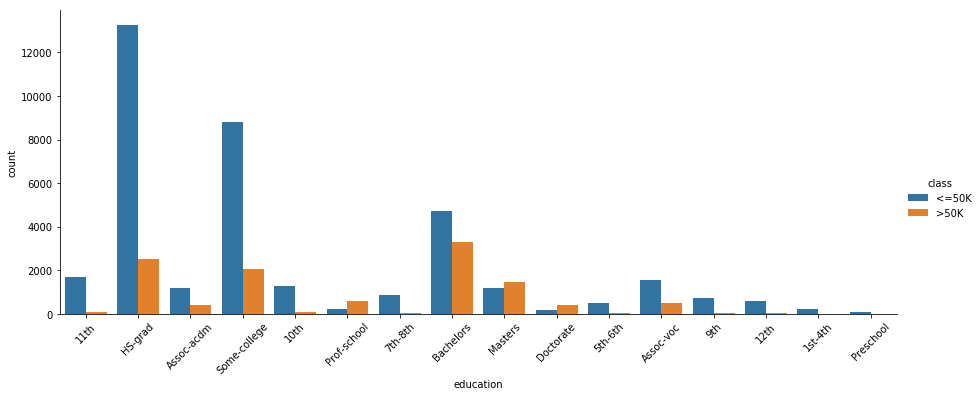

In [16]:
sns.catplot(x='education', kind='count', hue='class', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

# Classification modeling

In this section, we will create classification models using K-nearest neighbors and Decision Tree models.


### Setting up the data for modeling

In [17]:
def encode_cat_labels(df, cols=None):
    new_df = df.copy()
    refs = {}
    
    if cols == None:
        cols = [col for col in data.columns if data[col].dtype == 'object']
    
    for col in cols:
        le = preprocessing.LabelEncoder()
        le.fit(data[col])
        new_df[col] = le.transform(new_df[col])
        refs[col] = {k:v for (k,v) in zip(le.classes_, le.transform(le.classes_))}
    return new_df, refs

In [18]:
def calc_metrics(labels, preds, beta=0.5):
    
    metrics = {
        "precision": precision_score(labels, preds),
        "recall" : recall_score(labels, preds),
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds),
        "f_b": fbeta_score(labels, preds, beta=beta),
        "error": np.mean(labels != preds)
    }
    return metrics

In [19]:
# Get all of the string columns within the dataframe
cols = [col for col in data.columns if data[col].dtype == 'object']
model_df, col_refs= encode_cat_labels(data, cols)

In [20]:
model_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [21]:
target_name = 'class'
try:
    target = model_df[target_name]
    model_df.drop(labels=target_name, inplace=True, axis=1)
except:
    print(f'The target: {target_name}, has already been dropped from the dataframe')
    print(model_df.columns)

### Train Test Split

In [22]:
##Setting up the train_test split
x_train, x_test,y_train, y_test = train_test_split(model_df, 
                                                    target, test_size=0.35, random_state=42)

# Instantiate StandardScaler
scaler = preprocessing.StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(x_train)
scaled_data_test = scaler.transform(x_test)

#### Further investigation into the nature of the data

In [23]:
x_train.shape, x_test.shape

((31747, 14), (17095, 14))

In [24]:
## Based on the info below, most of the rows are 0 in our train data
zero_count = np.where(y_train == 0)[0].shape[0]
one_count = y_train.shape[0] - zero_count
print(f"Total rows with 0: \t{zero_count}")
print(f"Total rows with 1:  \t{one_count}")
print(f"Total rows in y_train: {y_train.shape[0]}")

Total rows with 0: 	24087
Total rows with 1:  	7660
Total rows in y_train: 31747


In [25]:
zero_count = np.where(y_test == 0)[0].shape[0]
one_count = y_test.shape[0] - zero_count
print(f"Total rows with 0: \t{zero_count}")
print(f"Total rows with 1:  \t{one_count}")
print(f"Total rows in y_test:  {y_test.shape[0]}")

Total rows with 0: 	13068
Total rows with 1:  	4027
Total rows in y_test:  17095


In [26]:
## Based on the information below, our dataset is highly imbalanced
zero_count = np.where(target == 0)[0].shape[0]
one_count = target.shape[0] - zero_count
print(f"Total rows with 0: \t{zero_count}")
print(f"Total rows with 1:  \t{one_count}")
print(f"Total rows in target:  {target.shape[0]}")

Total rows with 0: 	37155
Total rows with 1:  	11687
Total rows in target:  48842


Here, we are using PCA to break down the data into two principle components, so that the data maybe plotted to see if there are any trends or patterns available that may have an impact on the performance of our models.  

In the following cells below, we will graph the data before and after applying the standardized scalar fro scikit learn

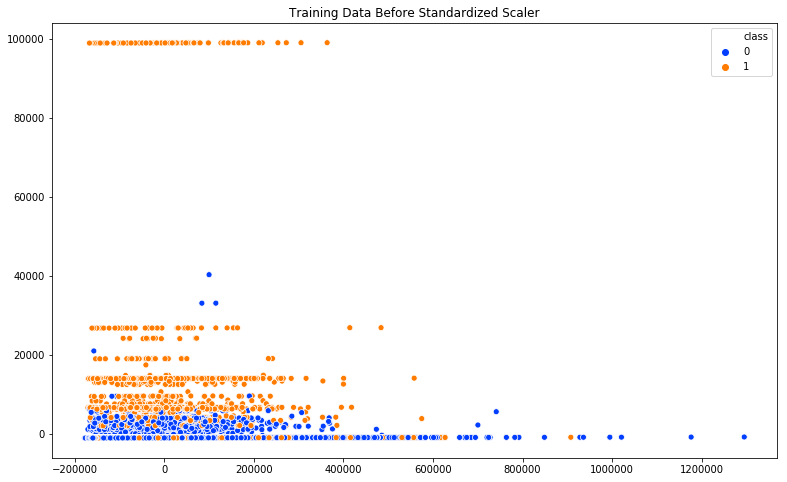

In [27]:
### PCA Plot
# sns.set(rc={'figure.figsize':(13,8)})
# sns.set(style='whitegrid')

pca = PCA(n_components=2)

pca_values = pca.fit_transform(x_train)

plt.figure(figsize=(13,8))
sns.scatterplot(x=pca_values[:,0], y=pca_values[:,1], hue=y_train, palette='bright')
plt.title('Training Data Before Standardized Scaler')
plt.show()

In the graph above, there seems to be a fair amount of separation between the different classes we are attempting to predict.

After transforming the data, it becomes more visible that there is a high level of correlation between the different targets that we are attempting to predict.  There is some level of separation, but not a large one between the differnet classes

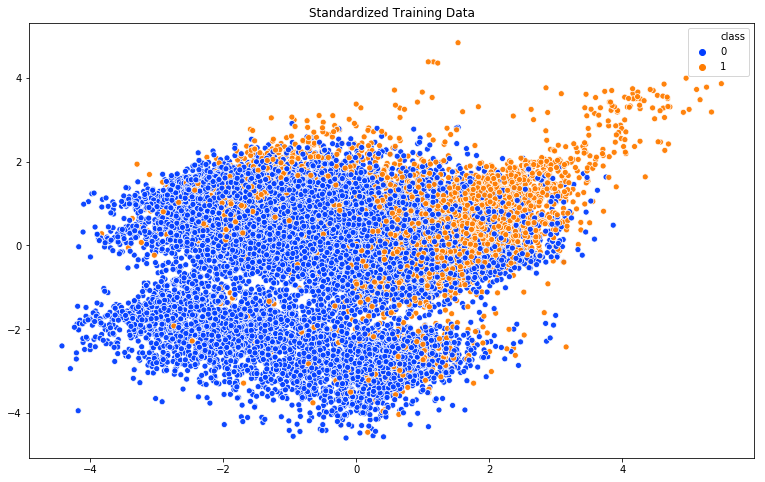

In [28]:
### PCA Plot
pca = PCA(n_components=2)

pca_values = pca.fit_transform(scaled_data_train)

plt.figure(figsize=(13,8))
sns.scatterplot(x=pca_values[:,0], y=pca_values[:,1], hue=y_train, alpha=0.95, palette='bright')
plt.title('Standardized Training Data')
plt.show()

In the graph below, we have another model of the data in a 3D space.

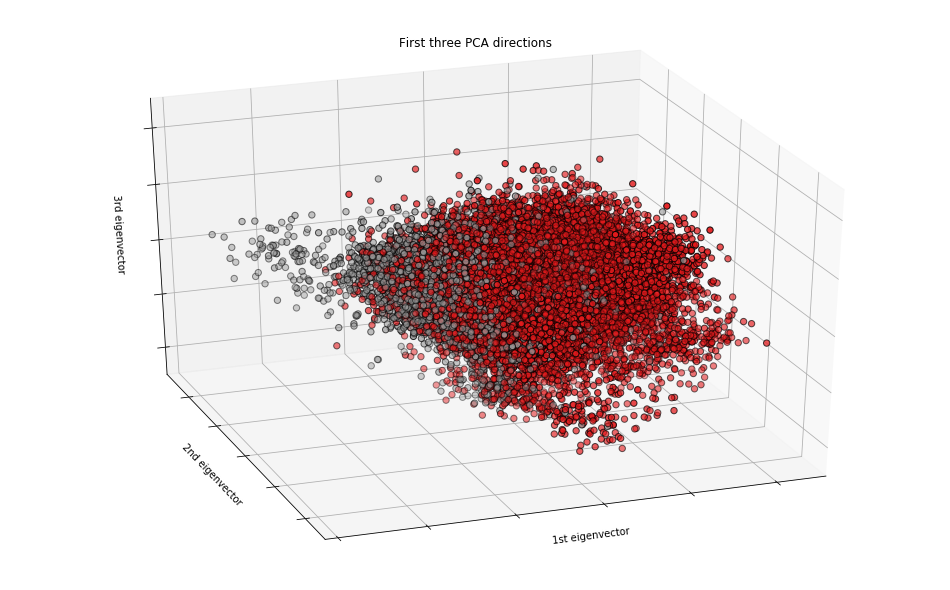

In [29]:
### 3 Dimensional PCA Plot of Training Data
pca = PCA(n_components=3)

## Plotting the first 3 dimensions
fig = plt.figure(1, figsize=(13, 8))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = pca.fit_transform(scaled_data_train)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

3D Rendering of the training dataset with plotly

In [30]:
# # 3D Rendering of the training dataset with plotly

# fig = go.Figure(data=[go.Scatter3d(
#     x=X_reduced[:,0],
#     y=X_reduced[:,1],
#     z=X_reduced[:,2],
#     mode='markers',
#     marker=dict(
#         size=3,
#         color=y_train,                # set color to an array/list of desired values
#         colorscale='Cividis',   # choose a colorscale
#         opacity=0.8,
#     )
# )])

# # tight layout
# fig.update_layout(margin=dict(l=10, r=10, b=10, t=10))
# fig.show()

Now that the data transformation is complete, the next step is to generate the learning models and see how the scaling affects the models.

## K-nearest neighbors modeling

In [31]:
def generate_knn(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    
    neighbors = [] # list to hold metrics of the neighbors
    for k in range(min_k, max_k+1):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        metrics = calc_metrics(labels=y_test, preds=preds)
        
        metrics['k'] = k # append k_value to the calculated metrics
        neighbors.append(metrics)
          
    return neighbors

In [32]:
def graph_knn_metrics(list_of_neighbors, fsize=(15,8)):
    graphs = {}
    
    # Pull the values from the dictionaries and store in list format
    for item in list_of_neighbors:
        keys =  item.keys()
        for key in keys:
            if key in graphs:
                graphs[key].append(item[key])
            else:
                graphs[key] = [item[key]]
    
    # Graph the values within the list
    for key in keys:
        if key != 'k':
            plt.figure(figsize=fsize)
            plt.plot(graphs['k'], graphs[key], color='red', linestyle='dashed', marker='o',
                     markerfacecolor='blue', markersize=10)
            plt.grid()
            plt.title(f'{key.upper()}')
            plt.xlabel('K Value')
            plt.ylabel('Score')

In [33]:
# This will be the list to hold the different KNN models, to compare later on
list_of_best_KNN = []

#### Baseline model without feature scaling

There is an upward and downward trend in our graphs. This is the result of low correlation in our untransformed, train-test split

In [34]:
list_of_neighbors = generate_knn(x_train, y_train, x_test, y_test, max_k=30)

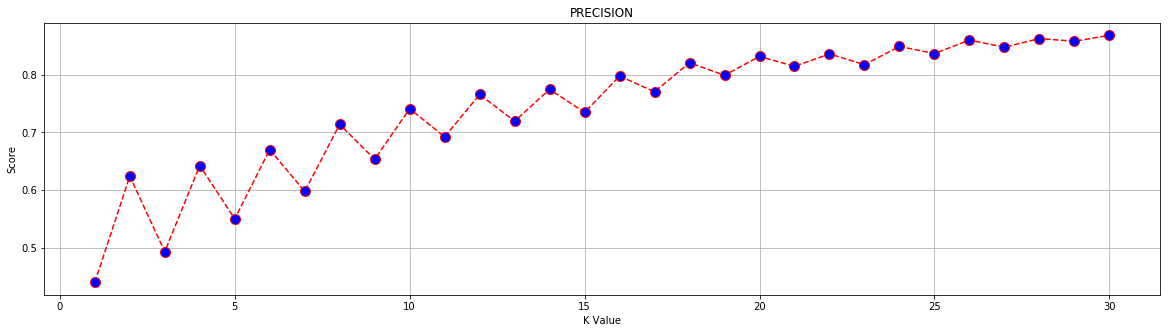

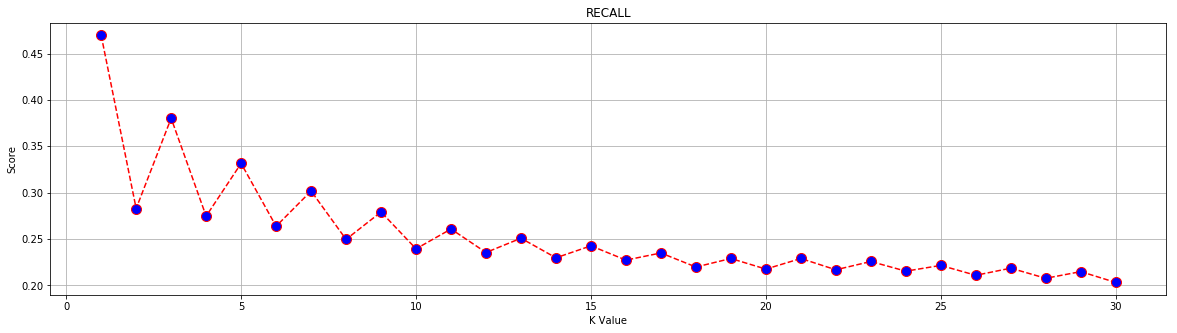

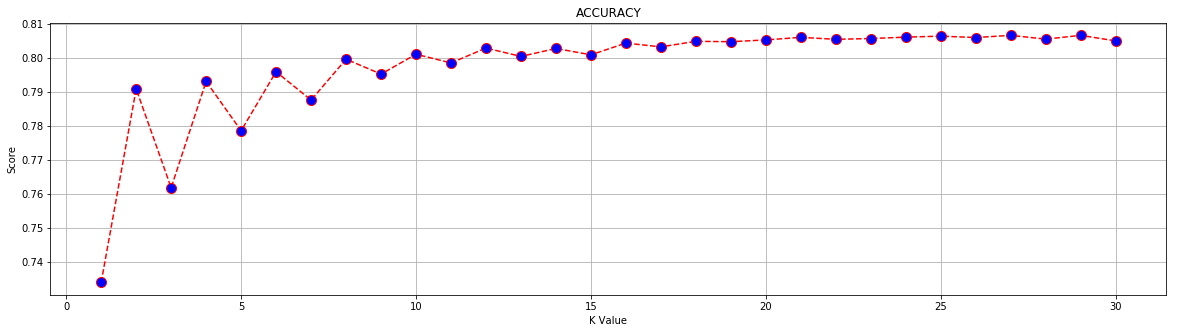

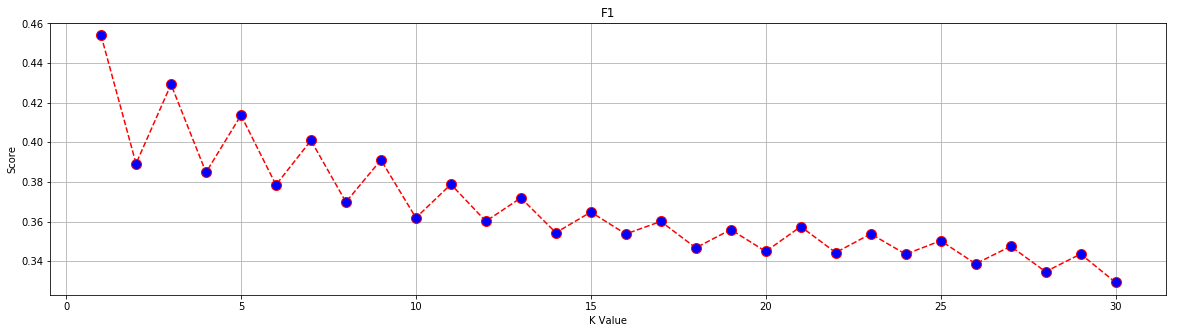

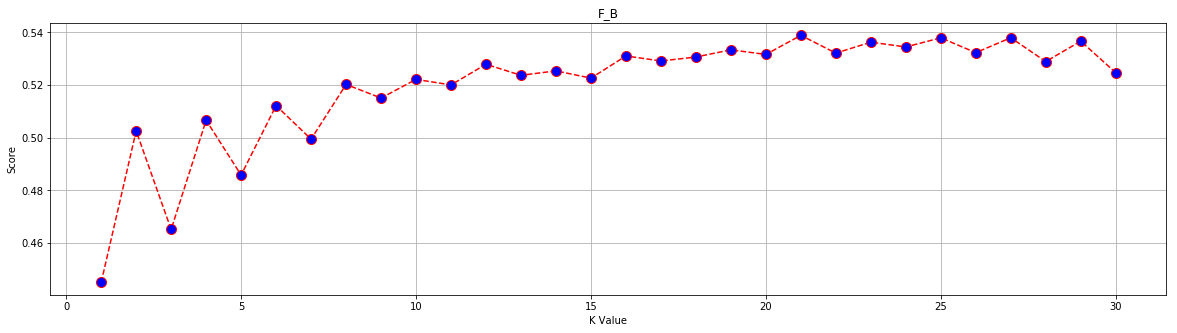

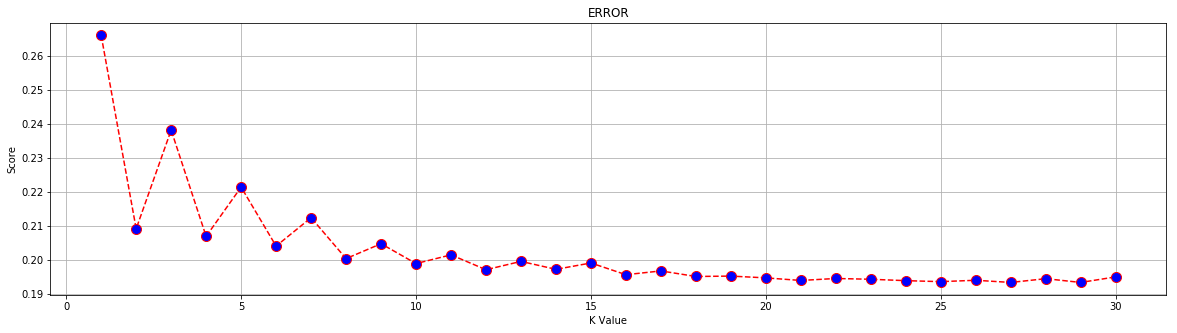

In [35]:
graph_knn_metrics(list_of_neighbors, fsize=(20,5))

In [36]:
def find_best_score(score='f1', list_of_dict=None, verbose=False):
    """
        Small function to return the model with the best metric score 
        
        Parameters:
            score {str}:
                String that corresponds to the evaluation metric to search for
            list_of_dict {list}:
                List containing the dictionaries that have the metrics for the respective models
        
        Returns:
            Dictionary with the metrics and values contained therein, for the respective model
    """
    best_f1 = list_of_dict[0].copy()
    for i in range(1, len(list_of_dict)):
        if best_f1['f1'] < list_of_dict[i]['f1']:
            best_f1 = list_of_dict[i].copy()
            if verbose:
                print(f'Reassign best_f1. New F1_score:{best_f1["f1"]} index: {i}')
    return best_f1

In [37]:
best_KNN_f1 = find_best_score(list_of_dict=list_of_neighbors)
best_KNN_f1['title'] = "Baseline_no_scaling_KNN"

list_of_best_KNN.append(best_KNN_f1)

#### Model with feature scaling

By introducing feature scaling, the results of our KNN model has had an overall increase in the different metrics used.
It was interesting to see that the precision of the model began to plateau as a result of the introduction of scaling our training data and the results of the model are more consistent now.  

In [68]:
list_of_neighbors = generate_knn(scaled_data_train, y_train, scaled_data_test, y_test, max_k=30)

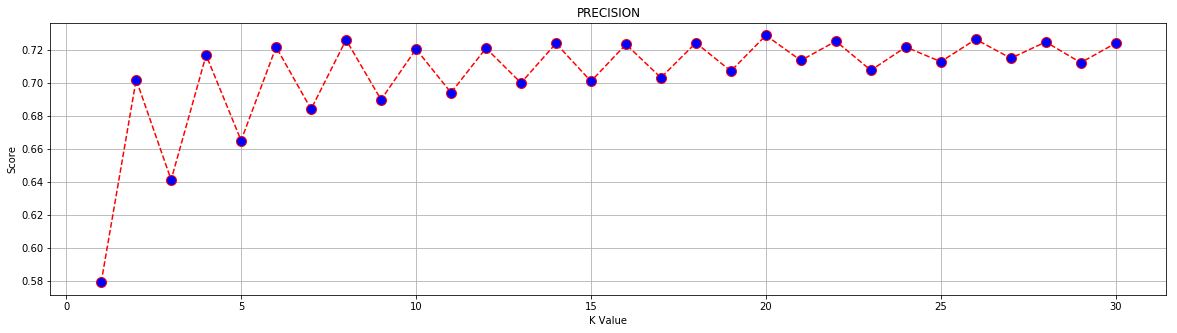

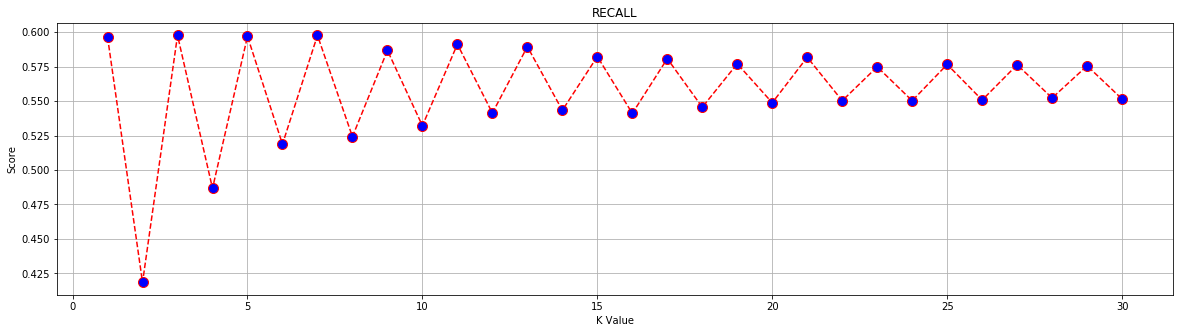

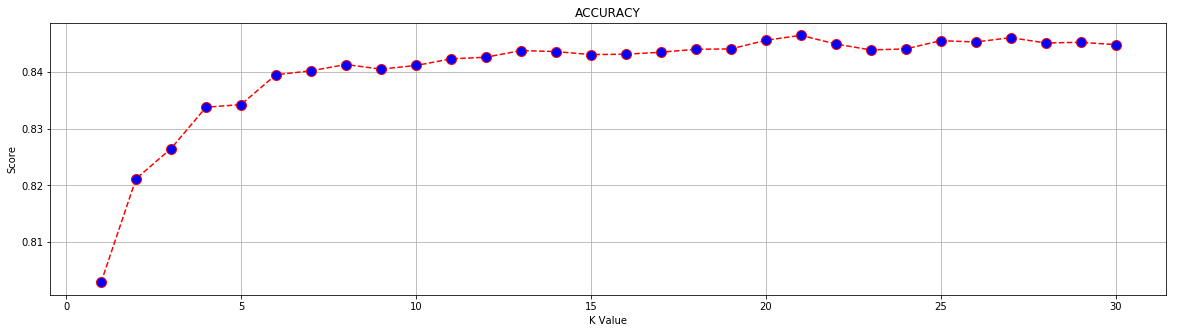

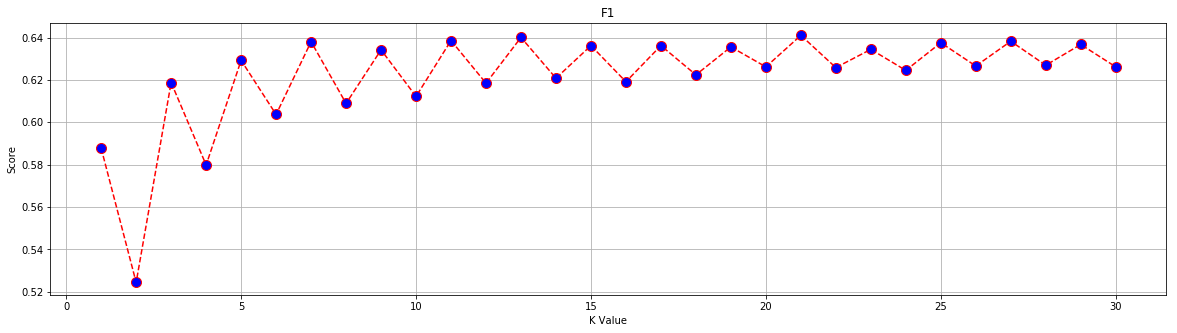

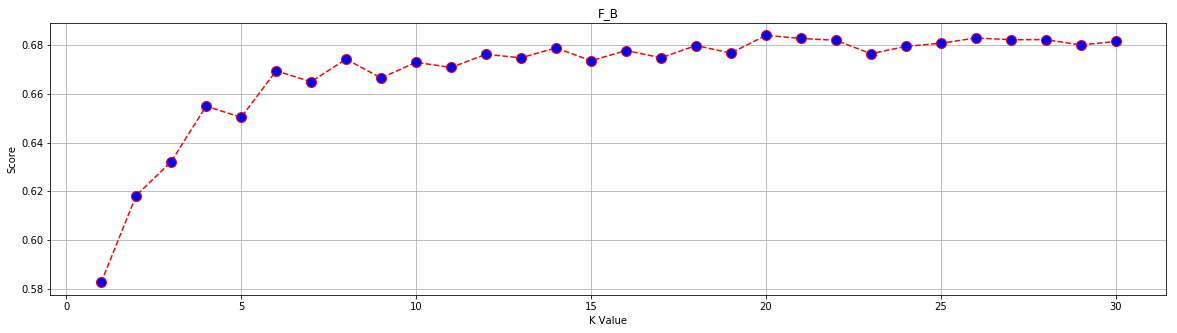

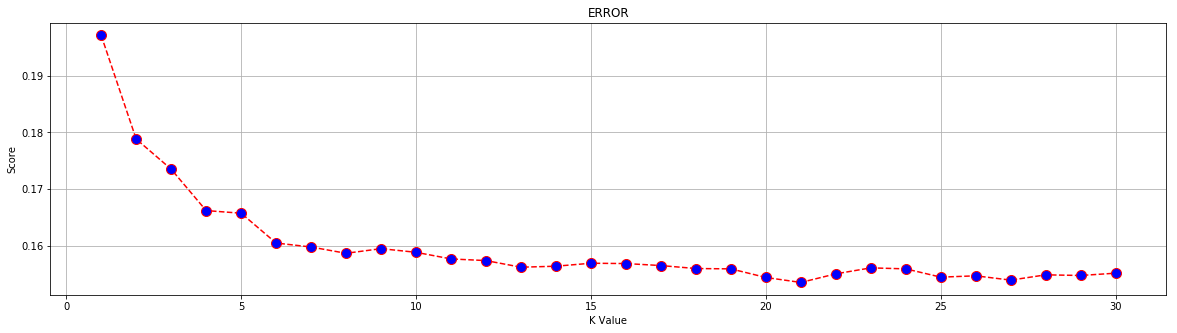

In [69]:
graph_knn_metrics(list_of_neighbors, fsize=(20,5))

In [70]:
## Lines of code to find_best_scoreblist_of_dict=add the best KNN model to our list
best_KNN_f1 = find_best_score(list_of_dict=list_of_neighbors)
best_KNN_f1['title'] = "KNN_scaled"

list_of_best_KNN.append(best_KNN_f1)

#### KNN with Grid SearchCV using scaled data

In [ ]:
param_grid = {
    'n_neighbors': list(range(5,21,2)),
    'p': [1,2,3],
    'weights': ['uniform','distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='f1', verbose=True, n_jobs=-1)
grid.fit(scaled_data_train, y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

###### Best parameters from KNN GridSearchCV
Best F1_score: 0.6253623110482003 <br>
Best parameters: `{'n_neighbors': 19, 'p': 1, 'weights': 'distance'}` <br>
Best Estimator: `KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=1,
                     weights='distance')`

In [38]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                           metric_params=None, n_jobs=-1, n_neighbors=19, p=1, weights='distance')
clf.fit(scaled_data_train, y_train)
y_preds = clf.predict(scaled_data_test)

best_KNN_grid = calc_metrics(labels=y_test, preds=y_preds)
best_KNN_grid['title'] = 'Best_grid_KNN'
best_KNN_grid['k'] = clf.n_neighbors

In [39]:
list_of_best_KNN.append(best_KNN_grid)

### Comparison of KNN Metrics

In [40]:
def graph_metrics_comparison(list_of_dict=None, exclusion_list=None, title_of_graph=''):

    df = pd.DataFrame([knn for knn in list_of_dict])
    df.set_index(keys='title', inplace=True)

    # Setup the featuers to plot for the respective models within our list of dictionaries
    if exclusion_list:
        x = [key for key in df.columns if key not in exclusion_list]
    else:
        x = [key for key in df.columns]
        
    names = list(df.index)
    
    fig = go.Figure()

    for name in names:
        fig.add_trace(go.Bar(x=x, 
                             y=df[df.index==name][x].values.reshape(-1), 
                             name=name))
    fig.update_layout(title_text=title_of_graph)
    fig.show()

In [71]:
graph_metrics_comparison(list_of_dict=list_of_best_KNN, exclusion_list=['k'], title_of_graph='Best KNN Metrics Comparisons')

![Best KNN Comparisons](../Classification-Modeling/Classification_Notebook_files/Best_KNN_Comparisons.png)

## Decision Tree Modeling

In this section, we will setup a base decision tree and also attempt to increase the performance of the tree via the following hyper parametres: `max_depth` and `max_features`

In [42]:
list_of_best_DT = []

#### Base decision tree

In [43]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(scaled_data_train, y_train)
y_preds = clf.predict(scaled_data_test)

best_DT_metrics = calc_metrics(y_test, y_preds)
best_DT_metrics['title'] = 'Baseline_DT'

list_of_best_DT.append(best_DT_metrics)

### Decision Tree with hyper parameter tunning: `max_features` 

In [44]:
def graph_dt_metrics(list_of_metrics, fsize=(15,8), title='', x_label=''):
    graphs = {}
    
    # Pull the values from the dictionaries and store in list format
    for item in list_of_metrics:
        keys =  item.keys()
        for key in keys:
            if key in graphs:
                graphs[key].append(item[key])
            else:
                graphs[key] = [item[key]]
        
    # Graph the values within the list
    for key in keys:
        plt.figure(figsize=fsize)
        plt.plot(range(1, len(graphs[key])+1), graphs[key], color='blue', linestyle='dashed', marker='o',
                 markerfacecolor='red', markersize=10)
        plt.grid()
        plt.title(f'{title}\n{key.upper()}')
        plt.xlabel(x_label)
        plt.ylabel('score')
        plt.show()

In [45]:
max_feat_metrics = []
for i in range(1, len(model_df.columns)+1 ):
    clf = DecisionTreeClassifier(criterion='entropy', max_features=i)
    clf.fit(scaled_data_train, y_train)
    y_preds = clf.predict(scaled_data_test)

    max_feat_metrics.append(calc_metrics(y_test, y_preds))

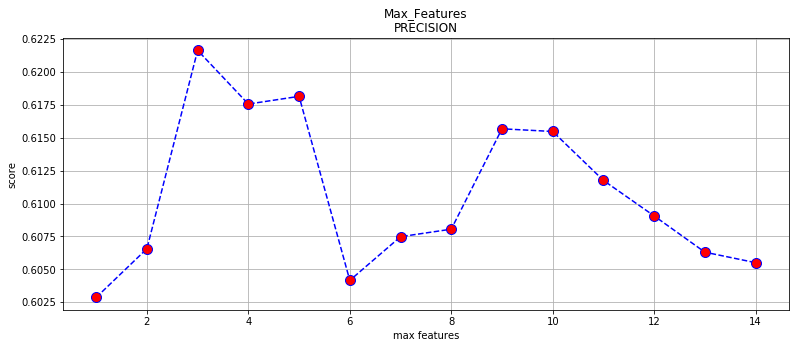

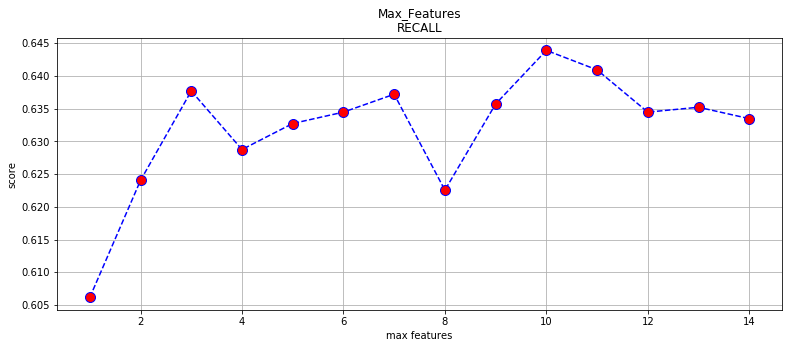

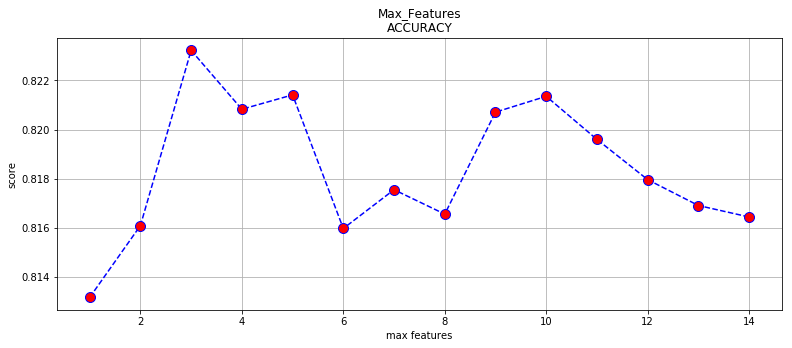

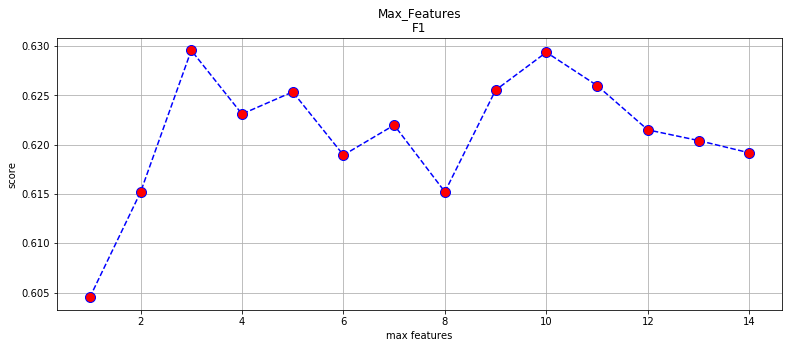

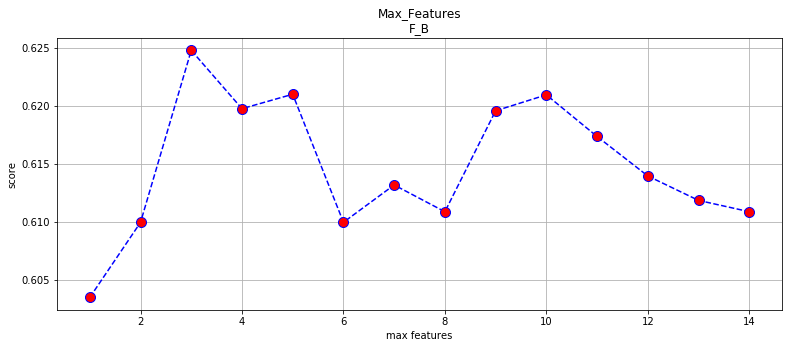

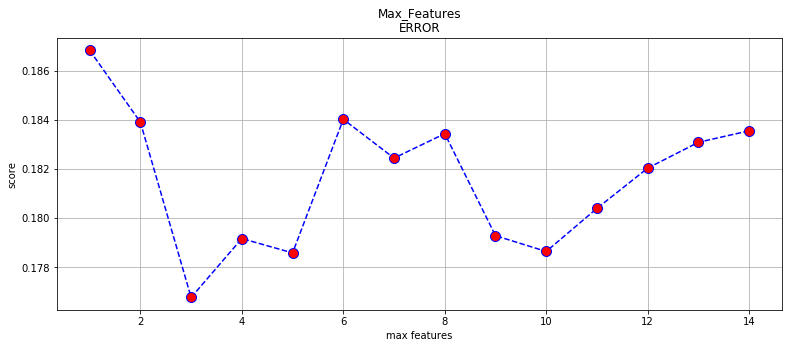

In [46]:
graph_dt_metrics(max_feat_metrics, fsize=(13,5), title='Max_Features', x_label='max features')

In [47]:
best_max_feat_DT = find_best_score(list_of_dict=max_feat_metrics)
best_max_feat_DT['title'] = 'max_features_DT'

list_of_best_DT.append(best_max_feat_DT)

### Decision Tree hyper parameter tunning: `max_depth`

In [48]:
max_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(scaled_data_train, y_train)
    y_preds = clf.predict(scaled_data_test)

    max_depth_metrics.append(calc_metrics(y_test, y_preds))

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



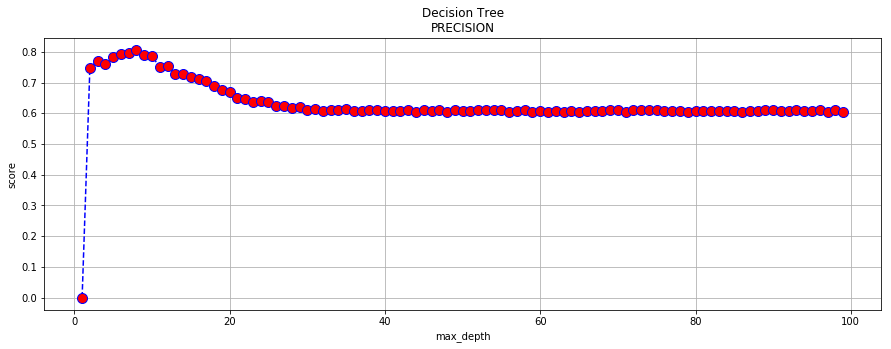

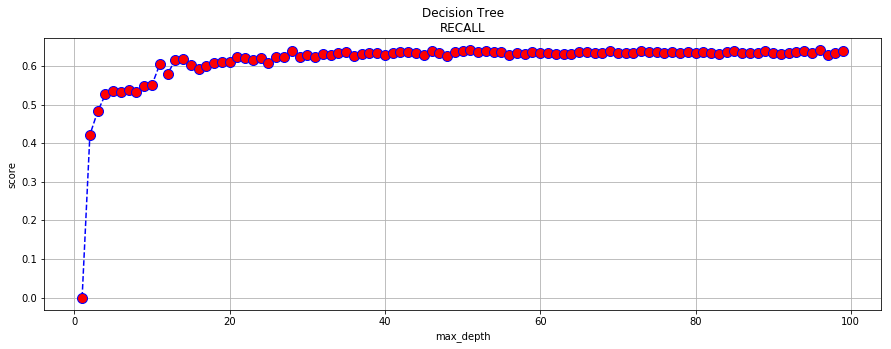

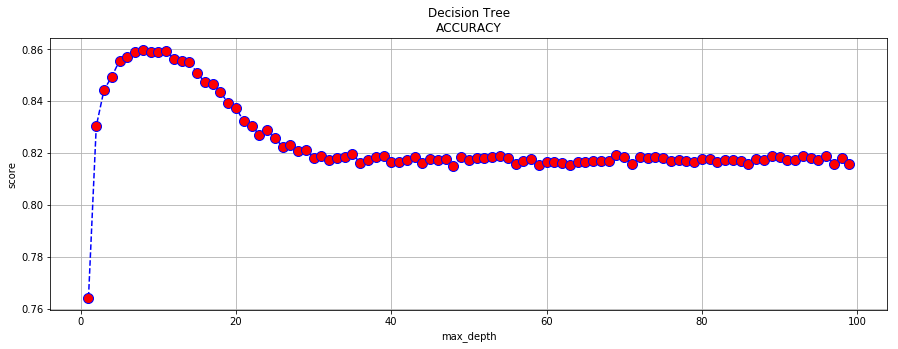

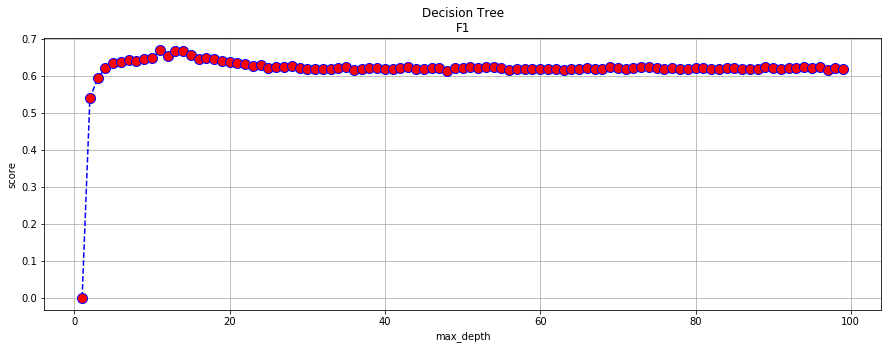

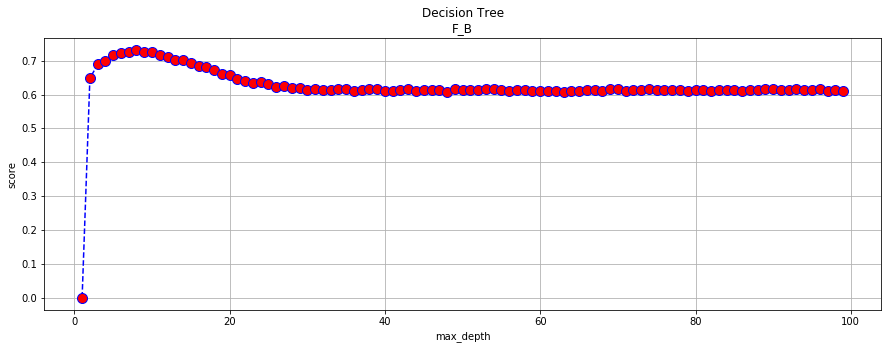

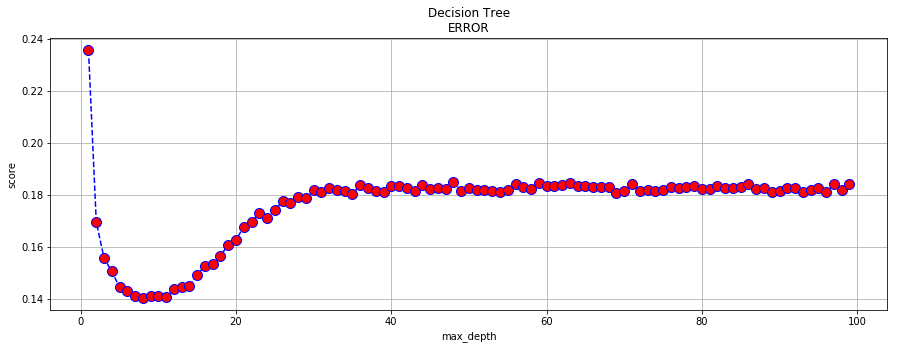

In [49]:
graph_dt_metrics(max_depth_metrics, fsize=(15,5), title='Decision Tree', x_label='max_depth')

In [50]:
best_max_depth_DT = find_best_score(list_of_dict=max_depth_metrics)
best_max_depth_DT['title'] = 'max_depth_DT'

list_of_best_DT.append(best_max_depth_DT)

### Decision tree hyper parameter tunning: `max_features: 12` & `max_depth`


In [51]:
feat_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features=12)
    clf.fit(scaled_data_train, y_train)
    y_preds = clf.predict(scaled_data_test)

    feat_depth_metrics.append(calc_metrics(y_test, y_preds))

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



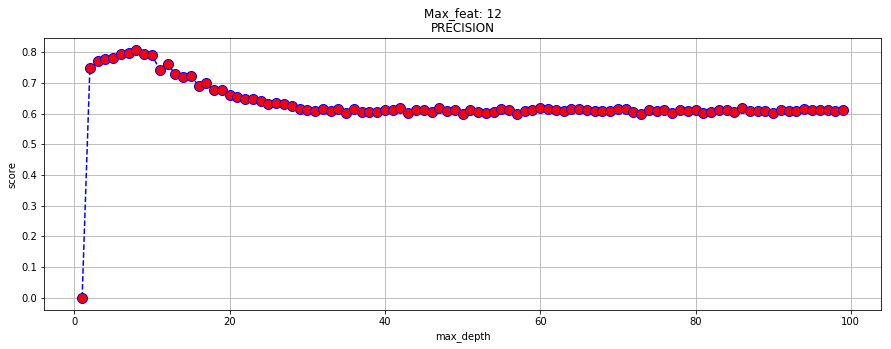

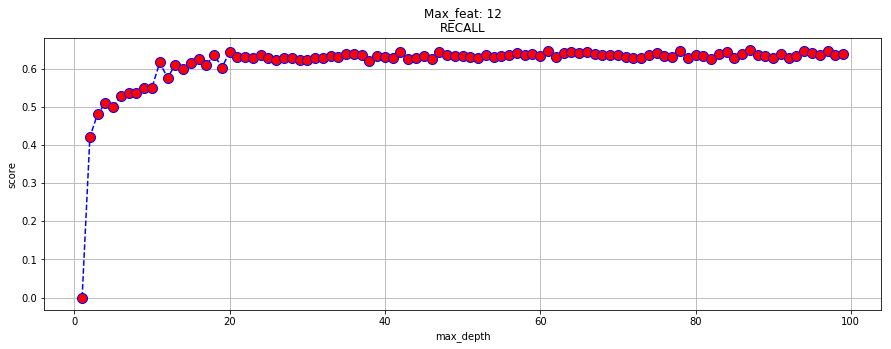

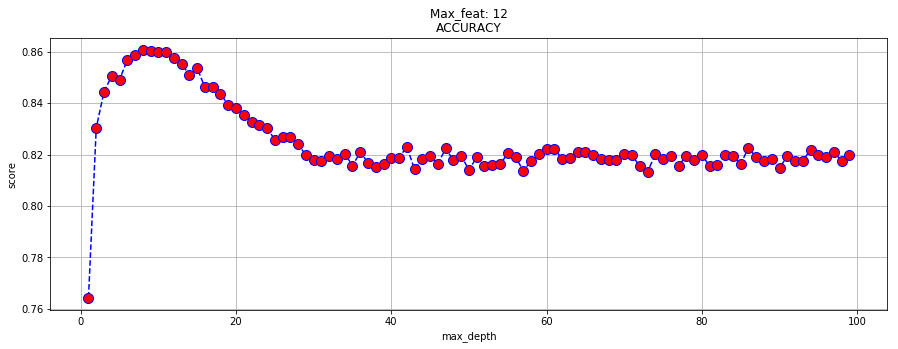

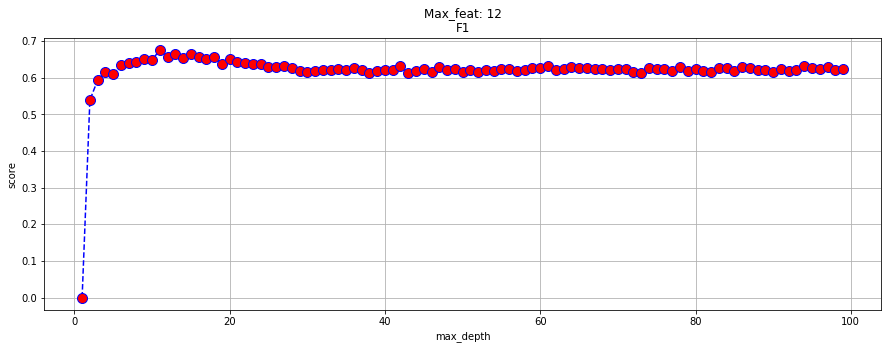

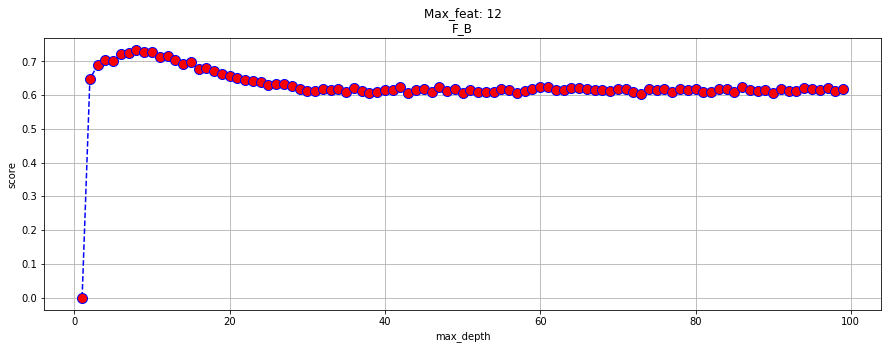

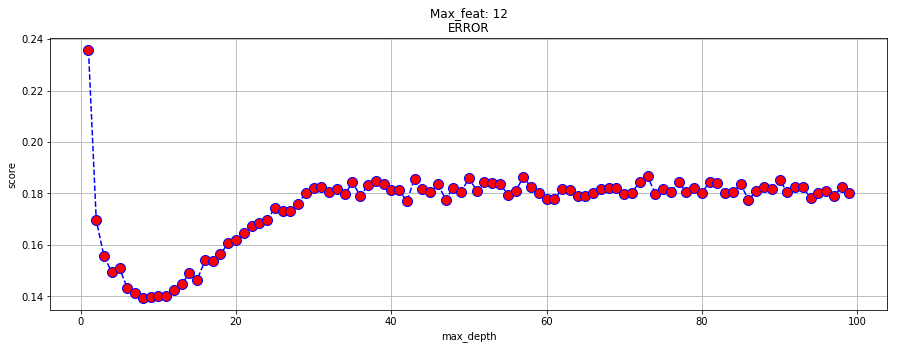

In [52]:
graph_dt_metrics(feat_depth_metrics, title="Max_feat: 12", x_label='max_depth', fsize=(15,5))

In [53]:
best_max_depth_feat_DT = find_best_score(list_of_dict=feat_depth_metrics)
best_max_depth_feat_DT['title'] = 'max_feat12_depth_DT'

list_of_best_DT.append(best_max_depth_feat_DT)

### Decision Tree Tuning using max_features: 9 & max_depth

In [54]:
feat_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features=9)
    clf.fit(scaled_data_train, y_train)
    y_preds = clf.predict(scaled_data_test)

    feat_depth_metrics.append(calc_metrics(y_test, y_preds))

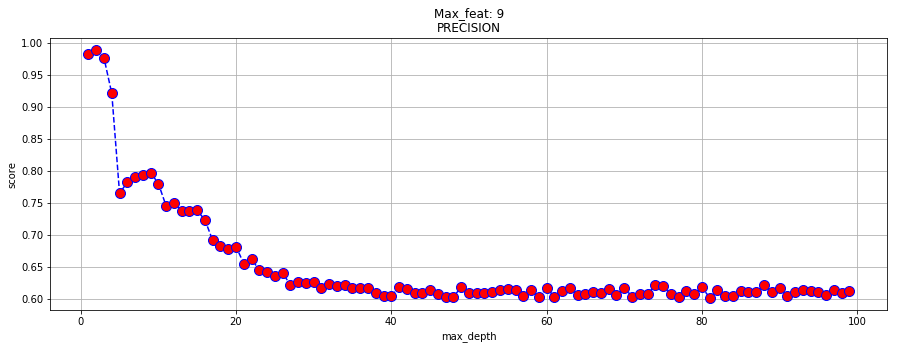

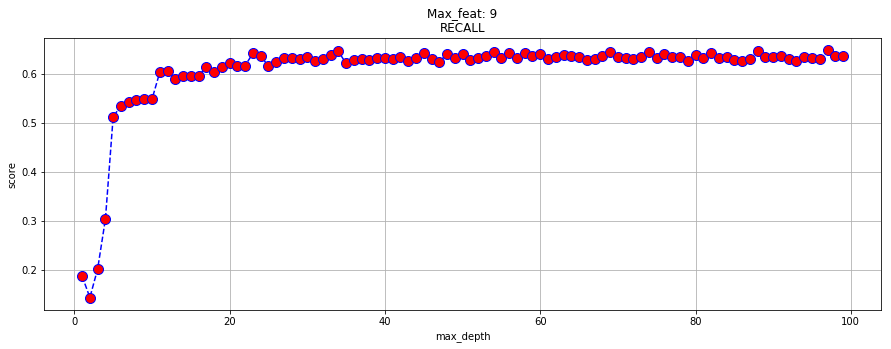

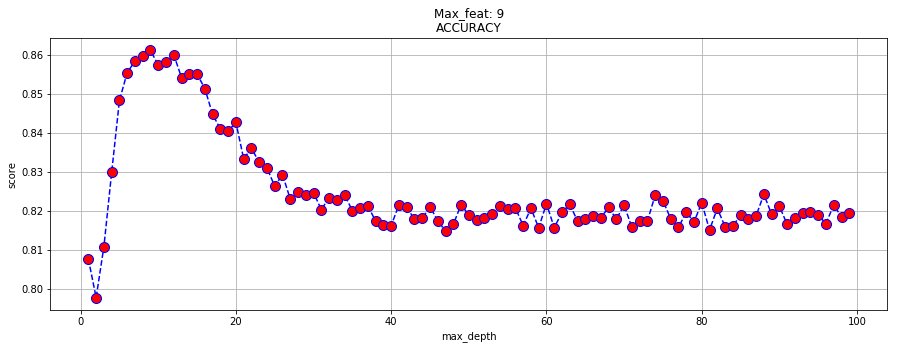

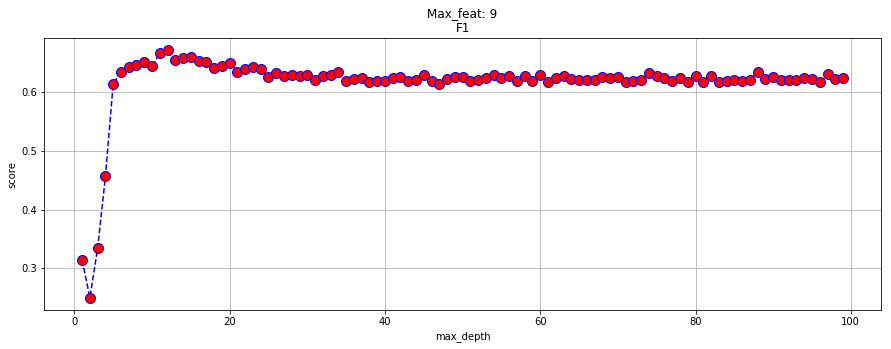

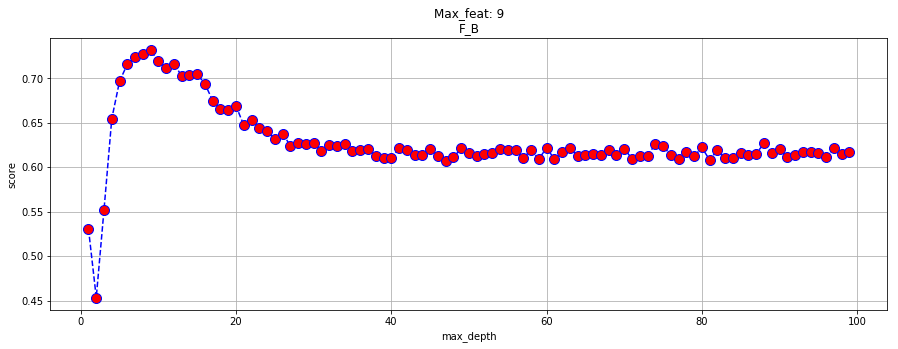

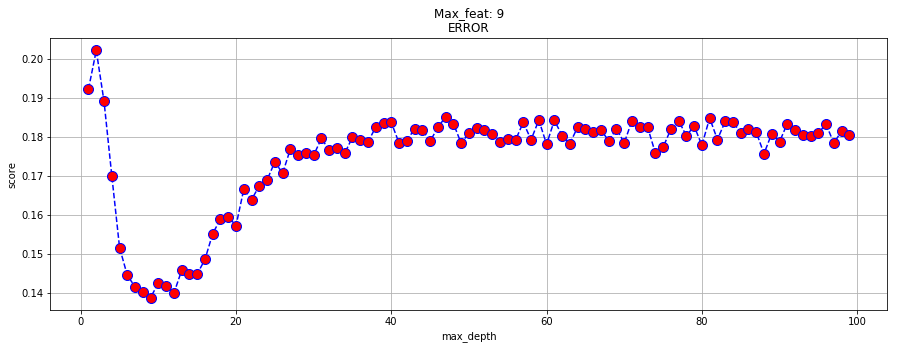

In [55]:
graph_dt_metrics(feat_depth_metrics, title="Max_feat: 9", x_label='max_depth', fsize=(15,5))

In [56]:
best_max_depth_feat_DT = find_best_score(list_of_dict=feat_depth_metrics)
best_max_depth_feat_DT['title'] = 'max_feat9_depth_DT'

list_of_best_DT.append(best_max_depth_feat_DT)

### Decision Tree with GridSearchCV

_Pool_1_DT_

In [ ]:
param_grid = {
    'criterion':['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': list(range(1, len(model_df.columns)+1)),
    'min_samples_split': list(range(1,25))
    }

grid = GridSearchCV(DecisionTreeClassifier(), verbose=True,
                    param_grid=param_grid, scoring='f1', n_jobs=-1)
grid.fit(scaled_data_train, y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [57]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=24,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf.fit(scaled_data_train, y_train)
y_preds = clf.predict(scaled_data_test)

tree = calc_metrics(y_test, y_preds)
tree['title'] = "Pool_1_grid_DT"

list_of_best_DT.append(tree)

_Pool_2_DT_

In [ ]:
param_grid = {
    'criterion':['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': list(range(1, len(model_df.columns)+1)),
    'min_samples_split': list(range(25, 50))
    }
grid = GridSearchCV(DecisionTreeClassifier(), verbose=True, 
                    param_grid=param_grid, scoring='f1', n_jobs=-1)
grid.fit(scaled_data_train, y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [58]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=24,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf.fit(scaled_data_train, y_train)
y_preds = clf.predict(scaled_data_test)

tree = calc_metrics(y_test, y_preds)
tree['title'] = "Pool_2_grid_DT"

list_of_best_DT.append(tree)

_Pool_3_DT_

In [ ]:
param_grid = {
    'criterion':['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': list(range(1, len(model_df.columns)+1)),
    'min_samples_split': list(range(49,55)),
    'max_depth': list(range(10,20))
    }

grid = GridSearchCV(DecisionTreeClassifier(), verbose=True,
                    param_grid=param_grid, scoring='f1', n_jobs=-1)
grid.fit(scaled_data_train, y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [59]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=24,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf.fit(scaled_data_train, y_train)
y_preds = clf.predict(scaled_data_test)

tree = calc_metrics(y_test, y_preds)
tree['title'] = "Pool_3_grid_DT"

list_of_best_DT.append(tree)

### Compare Metrics of Decision Trees

In [60]:
graph_metrics_comparison(list_of_dict=list_of_best_DT, title_of_graph="Decision Trees Comparisons")

![Decision_Trees_Comparisons](../Classification-Modeling/Classification_Notebook_files/Decision_Trees_Comparisons.png)

## SVM Machines

Here, we are using SVM machines to generate another model, to see if it can potentially outperform our Decision Tree and KNN.  
This was added for fun and as a means to further practice modeling with `sklearn`.

In the KNN model, the baseline was created using unscaled data.  Scaled data is used for the SVM Models. 
This is done because the difference in magnitude of our unscaled data creates issues within the SVM and causes certain metrics to zero out. The same error is seen when we utilize the unscaled data with our optimized SVM model.

**_Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:_** <br/>
**Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.**

In [61]:
list_of_svm = []

#### Baseline SVM Machine

In [62]:
clf = SVC(gamma='auto')
clf.fit(scaled_data_train, y_train)
y_preds = clf.predict(scaled_data_test)

In [63]:
svm_metrics = calc_metrics(labels=y_test, preds=y_preds)
svm_metrics['title'] = 'Baseline_SVM'
list_of_svm.append(svm_metrics)

### Running SVM using GridSearchCV to find the optimum conditions for our SVM

The following section of code blocks, may take a decent amount of time to run. The different parameters were split into different pools to minimize the runtime of the section, so as to find the best combinations within their respective groups.  GridSearch was also applied to each of the 3 pools to get the best ones from among them to compare later on.

The scoring used to evaluate the best models is **F1.**

_Pool_1_ Grid Search Results

In [ ]:
## Running CSV with higher penalies
# defining parameter range 
param_grid = {'C': [0.0001, 0.001, 0.01],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3, scoring='f1', cv=10, n_jobs=-1)
  
# fitting the model for grid search 
grid.fit(scaled_data_train, y_train)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

_Pool_2_ Grid Search Results

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, scoring='f1', n_jobs=-1)
  
# fitting the model for grid search 
grid.fit(scaled_data_train, y_train)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

_Pool_3_ GridSearch Results

In [ ]:
# defining parameter range 
param_grid = {'C': [100, 1000], 
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, scoring='f1', n_jobs=-1)
  
# fitting the model for grid search 
grid.fit(scaled_data_train, y_train)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

#### Comparing best SVM Models from the different pools created

In [64]:
clf_1 = SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf_1.fit(scaled_data_train, y_train)
y_preds = clf_1.predict(scaled_data_test)

svm_metrics = calc_metrics(labels=y_test, preds=y_preds)
svm_metrics['title'] = 'Pool_1_SVM'
list_of_svm.append(svm_metrics)

svm_metrics

{'precision': 0.794973544973545,
 'recall': 0.2984852247330519,
 'accuracy': 0.8166130447499269,
 'f1': 0.43401335981224043,
 'f_b': 0.5965260545905707,
 'error': 0.18338695525007312,
 'title': 'Pool_1_SVM'}

In [65]:
clf_2 = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf_2.fit(scaled_data_train, y_train)
y_preds = clf_2.predict(scaled_data_test)

svm_metrics = calc_metrics(labels=y_test, preds=y_preds)
svm_metrics['title'] = 'Pool_2_SVM'
list_of_svm.append(svm_metrics)

svm_metrics

{'precision': 0.7409638554216867,
 'recall': 0.5803327539111001,
 'accuracy': 0.8533489324363849,
 'f1': 0.6508842779557165,
 'f_b': 0.7020969777083459,
 'error': 0.1466510675636151,
 'title': 'Pool_2_SVM'}

In [66]:
clf_3 = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf_3.fit(scaled_data_train, y_train)
y_preds = clf_3.predict(scaled_data_test)

svm_metrics = calc_metrics(labels=y_test, preds=y_preds)
svm_metrics['title'] = 'Pool_3_SVM'
list_of_svm.append(svm_metrics)

svm_metrics

{'precision': 0.7546371623820372,
 'recall': 0.5758629252545319,
 'accuracy': 0.8559812810763381,
 'f1': 0.6532394366197184,
 'f_b': 0.7105214780317421,
 'error': 0.1440187189236619,
 'title': 'Pool_3_SVM'}

### Graphing SVM Metrics


In [67]:
graph_metrics_comparison(list_of_svm,title_of_graph='SVM Metric Comparison')

![SVM_graph_metrics_comparisons](../Classification-Modeling/Classification_Notebook_files/SVM_Metrics_Comparisons.png)

After looking further into our SVMs with GridSearhCV applied to find the best parameters to maximize the F1 scores, we see that our baselime model slightly edges out the competition from the different pools that we looked at.  The difference is very small within the SVMs that were determined to be the best.  

It was intereseting to see that the higher penalties within _Pool_1_ resulted in overall scores that were noticeable lower than the counterparts, however this group did produce the model with the best precision score of the SVMs.

# Summary

In this project, we sought to create a classification model using K-Nearest Neighbors, Decision Trees, and Support Vector Machines(SVMs) with the aid of Python's `sklearn` package.  The dataset and description of the features can be found at the following link: [Adult Dataset](https://www.openml.org/d/1590).

The models used and selected were tuned to the metric F1.

### KNN

The first model that was generated was KNN. This model is initally gave some what seemed to be strange results when passing in non-transformed data.  There were both upward and downward trends within the data that was caused by low correlation between the different target classes that were being predicted.  Once the data was transformed, the overall performance of the model increased and the results were more consistent than before.

### Decision Trees 

The best overall results within our Decision Tree Modeling utilized the following hyper parameters: `max_depth: 11` & `max_features: 12`. It is important to note that this tree did not have the highest score in each respective measure.  As different combinations were added, some measure increased, while others decreased. The decision was made to pick the tree with the smallest overall margin of change in the measures used.  

We used an iterative process to find the best combination of these hyper parameters that would give us an optimum decision tree. Although there are many combinations of hyper parameters that could be used, we decided to only use max_depth and max_features, to simplify the project.

### Support Vector Machine

In the support vector machine, the decision was made to use GridSearchCV to find the best models. Upon initally creating the grid search, the code to find the best model took between 2-3 hours to complete.  That initial code was broken into 3 different pools and some of the hyper parameters used were reduced to reduce runtim eand find the most effective model, once the non-effective hyper parameters were removed.

After tunning, the resulting models were very close, with the exception of that which came out of _Pool_1._
This pool had the highest penalties applied during the GridSearch process.  The models that had lower penalties tend to out perform those with the higher ones. 

### Conclusion

The Decision Tree that resulted from our hyper parameter tunning that gave the overall best performance and the most consistent results.  Our KNN Model has some very interesting results and unexpected results that were influenced by the scaling of the data. We were able to accurately predict a little over 85.7% of the data accurately, using Decision Trees, withouth losing much with the other metrics used.

Although this seems like a good statistic, the drawback of using Decision Trees may not make it a strong option for comparing data that has few patters.

In [72]:
best_models_comparison = []
best_models_comparison.append(find_best_score(list_of_dict=list_of_best_KNN))
best_models_comparison.append(find_best_score(list_of_dict=list_of_best_DT))
best_models_comparison.append(find_best_score(list_of_dict=list_of_svm))

graph_metrics_comparison(best_models_comparison, ['k'], title_of_graph='Comparison of best MLE models')

![Comparison of MLE Models](../Classification-Modeling/Classification_Notebook_files/Comparison_of_MLE_Models.png)

## Future Works

Possible future addition, or editions, to this project include the following:
* Pulling more recent data to see how demographics have increased over the years
* Web scrapping with the census bureau website to automatically update the data used.
* Using random forests instead of Decision Trees